In [33]:
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, f1_score
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
import utils

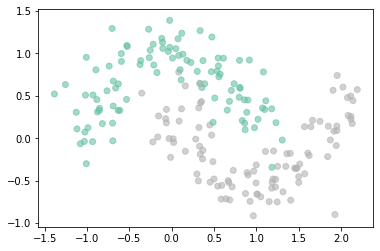

In [110]:
noise = 0.2
X, y = make_moons(200, noise = noise, random_state = 2718)
X_test, y_test = make_moons(40, noise = noise, random_state = 31415)

plt.scatter(*X.T, c = y, cmap = "Set2", alpha = 0.6)

In [111]:
model = Pipeline([
    
    ("poly", PolynomialFeatures(degree = 30, include_bias = False)),
    ("logreg", LogisticRegression(penalty = "none"))
])

In [112]:
bagging_logreg = BaggingClassifier(n_estimators=100, random_state = 314)

In [113]:
model.fit(X,y)

C:\Users\cegom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=30, include_bias=False,
                                    interaction_only=False, order='C')),
                ('logreg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='none', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [114]:
bagging_logreg.fit(X,y)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=100,
                  n_jobs=None, oob_score=False, random_state=314, verbose=0,
                  warm_start=False)

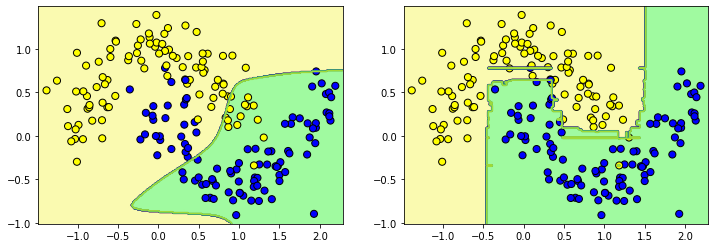

In [115]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
utils.plot_classf_model(X, y, model, ax = ax[0], contour = True)
utils.plot_classf_model(X, y, bagging_logreg, ax = ax[1], contour = True)

In [116]:
f1_score(y_test,model.predict(X_test))

0.7567567567567567

In [117]:
f1_score(y_test,bagging_logreg.predict(X_test))

0.9268292682926829